

# Project  - Retail

## DESCRIPTION

### Problem Statement
* Demand Forecast is one of the key tasks in Supply Chain and Retail Domain in general. It is key in effective operation and optimization of retail supply chain. Effectively solving this problem requires knowledge about a wide range of tricks in Data Sciences and good understanding of ensemble techniques.
* we are required to predict sales for each Store-Day level for one month. All the features will be provided and actual sales that happened during that month will also be provided for model evaluation.

### Goal
* The aim is to understand how each variable affecting the sale, their correlation with the sale. After exploring the variables, I will pre-process the data as needed. Once the data set is ready, I will use different models and presented the results for linear regression, decision tree and random forest model data. Model results will be visualized by plotting actual vs predicted for the sale of one month of data (July 2015) for each of these models. 

#### Data Description

 Data Description: Historic sales at Store-Day level for about two years for a retail giant, for more than 1000 stores. Also, other sale influencers like, whether on a particular day the store was fully open or closed for renovation, holiday and special event details, are also provided.

| Variables | Description |
| :--- | :--- |
| Store | Store Id. <br/> _**Numeric**_, _a uniquely assigned id to each store._ |
| DayOfWeek | The day number of the week when transaction was done.  <br/> _**Numeric**_,_a single digit integral number in range of **1 to 7** assigned to each transaction to represent the days from **Monday to Sunday** respectively._ |
| Date | Date of the transaction. <br/> _**Ordinal**, a text value which needs to be converted to **datetime** format._ |
| Sales | Total amount of income of the specific store on the specific day. <br/> _**Numeric**_ |
| Customers | Total number of customer who visited the specific store on the specific date. <br/> _**Numeric**_ |
| Open | Indicates that whether the specific store was **open** or **closed** on the specific date. <br/> _**Numeric**, where **1 - open** and **0 - closed**._ |
| Promo | Indicates that whether the specific store was offering any specific promotion on the specific date or not. <br/> _**Numeric**, where **1 - promotion offered** and **0 - no promotion offered**._ |
| StateHoliday | Indicates that whether there was a State Holiday on the specific date or not. <br/> _**Numeric**, where **1 - State Holiday** and **0 - No State Holiday**._ |
| SchoolHoliday | Indicates that whether there was a School Holiday on the specific date or not. <br/> _**Numeric**, where **1 - School Holiday** and **0 - No School Holiday**._ |_

## Data Snapshot

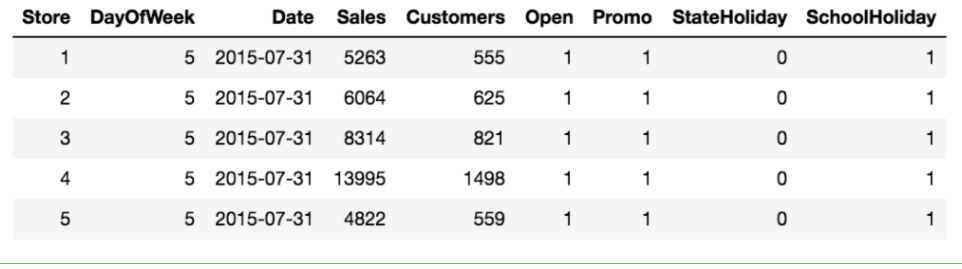

In [177]:
Image('C:\\Users\\Subhasish Das\\Desktop\\SimplyLearn\\Project\\AICapston\\Retail-Datasets\\retaildatasnapshot.png')

## Importing All the library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from statsmodels.formula.api import ols
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.decomposition import PCA
import xgboost as xgb
from IPython.display import Image
from sklearn.model_selection import train_test_split
from IPython.display import Image

C:\Users\Subhasish Das\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\Subhasish Das\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


# Reading The files

In [10]:
dt_sales=pd.read_csv("C:\\Users\\Subhasish Das\\Desktop\\SimplyLearn\\Project\\AICapston\\Retail-Datasets\\train_data.csv")

In [11]:
dt_sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,2,2015-06-30,5735,568,1,1,0,0
1,2,2,2015-06-30,9863,877,1,1,0,0
2,3,2,2015-06-30,13261,1072,1,1,0,1
3,4,2,2015-06-30,13106,1488,1,1,0,0
4,5,2,2015-06-30,6635,645,1,1,0,0


In [12]:
dt_sales.shape

(982644, 9)

In [13]:
dt_sales.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,982644.000000,982644.000000,982644.000000,982644.000000,982644.000000,982644.000000,982644.000000
mean,558.444843,3.998282,5760.843202,632.770227,0.828585,0.380183,0.171928
std,321.909907,2.000138,3857.573443,465.401378,0.376871,0.485432,0.377318
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,3705.000000,403.000000,1.000000,0.000000,0.000000
50%,558.000000,4.000000,5731.000000,609.000000,1.000000,0.000000,0.000000
75%,838.000000,6.000000,7847.000000,838.000000,1.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000,1.000000


In [14]:
dt_sales.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [15]:
dt_sales.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

#### Data Exploration

>In this case I can see that there are 8 independent variable and our target is to predict the sales(which is our dependent variable). In this dataset there is no missing value

#### Zero variance columns

>Now I will check if there is any column which is having zero in the dataset

In [16]:
zero_var=dt_sales.var()[dt_sales.var()==0].index.values

In [17]:
zero_var

array([], dtype=object)


>From the above code I can say that there is no column which is having zero variance <br/>

>Now I will check if there is any object type columns

In [18]:
obj_col=dt_sales.describe(include='object')
obj_col

,Date,StateHoliday
count,982644,982644
unique,911,5
top,2013-07-26,0
freq,1115,886058


In [19]:
obj_col=dt_sales.describe(include='object').columns.values

In [20]:
obj_col

array(['Date', 'StateHoliday'], dtype=object)

>From the above code I can see that there two object type columns 'Date','StateHoliday'. I need convert those column to int or float because at the time of prediction all the model expects input in int or float format


## Creating new columns
> Before i work with object type columns I will create two more column 'Month' and 'Year' from Date column which will help to make a good prediction

In [21]:
dt_sales['Month']=pd.DatetimeIndex(dt_sales['Date']).month
dt_sales['Year']=pd.DatetimeIndex(dt_sales['Date']).year

In [22]:
dt_sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,Year
0,1,2,2015-06-30,5735,568,1,1,0,0,6,2015
1,2,2,2015-06-30,9863,877,1,1,0,0,6,2015
2,3,2,2015-06-30,13261,1072,1,1,0,1,6,2015
3,4,2,2015-06-30,13106,1488,1,1,0,0,6,2015
4,5,2,2015-06-30,6635,645,1,1,0,0,6,2015


>Now I will drop the date column because I got the date columns information in Year and month column

In [23]:
dt_sales.drop('Date',axis=1,inplace=True)

In [24]:
obj_col=dt_sales.describe(include='object').columns.values
obj_col

array(['StateHoliday'], dtype=object)

In [25]:
corr_matrix=dt_sales.corr()
corr_matrix
corr_matrix['Sales'].sort_values(ascending=False)

Sales            1.000000
Customers        0.895700
Open             0.679248
Promo            0.451383
SchoolHoliday    0.076141
Month            0.048435
Year             0.019532
Store            0.005338
DayOfWeek       -0.461249
Name: Sales, dtype: float64

#### Observation 
>From the Corelation stat I can see that StateHoliday has no corelation <br/>
> Now I will apply one-hot encodding on StateHoliday column and i will check wheather the new columns have any corelation with the sales column or not

In [26]:
dt_sales.StateHoliday.unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [27]:
dt_sales.StateHoliday.value_counts()

0    886058
0     65536
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

#### Observation 
>There are two 0 values in StateHoliday column one value is considered as object in the dataset <br/>
>I will replace the other 0 which is a numeric one with the the object type '0'

In [28]:
dt_sales['StateHoliday'].replace({0:'0'},inplace=True)

In [29]:
dt_sales.StateHoliday.value_counts()

0    951594
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

#### Observation 
>Now I can see all the values in the StateHoliday columns
>Now I will replcae the value of 0 with x just to make this column look like a object type column <br/>

In [30]:
dt_sales['StateHoliday'].replace({'0':'x'},inplace=True)

In [31]:
dt_sales.StateHoliday.value_counts()

x    951594
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [32]:
dt_sales.StateHoliday.unique()

array(['x', 'a', 'b', 'c'], dtype=object)

In [33]:
st_holi=pd.get_dummies(dt_sales['StateHoliday'],drop_first=True)

In [34]:
dt_sales=pd.concat([dt_sales,st_holi],axis=1)

In [35]:
dt_sales.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,Year,b,c,x
0,1,2,5735,568,1,1,x,0,6,2015,0,0,1
1,2,2,9863,877,1,1,x,0,6,2015,0,0,1
2,3,2,13261,1072,1,1,x,1,6,2015,0,0,1
3,4,2,13106,1488,1,1,x,0,6,2015,0,0,1
4,5,2,6635,645,1,1,x,0,6,2015,0,0,1


> After applying one-hot encodding State Holiday column I have created three more columns named 'b','c','x' <br/>
>Now I will drop the StateHoliday column because I got the date columns information in b,c and x column

In [36]:
dt_sales.drop('StateHoliday',axis=1,inplace=True)

In [37]:
corr_matrix=dt_sales.corr()
corr_matrix
corr_matrix['Sales'].sort_values(ascending=False)

Sales            1.000000
Customers        0.895700
Open             0.679248
Promo            0.451383
x                0.257671
SchoolHoliday    0.076141
Month            0.048435
Year             0.019532
Store            0.005338
c               -0.093835
b               -0.119044
DayOfWeek       -0.461249
Name: Sales, dtype: float64

#### Observation 
>Now I can see that newly genertaed column have corelation with sales column <br/>


In [38]:
dt_sales.dtypes

Store            int64
DayOfWeek        int64
Sales            int64
Customers        int64
Open             int64
Promo            int64
SchoolHoliday    int64
Month            int64
Year             int64
b                uint8
c                uint8
x                uint8
dtype: object

## Data Vizualization

C:\Users\Subhasish Das\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Subhasish Das\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


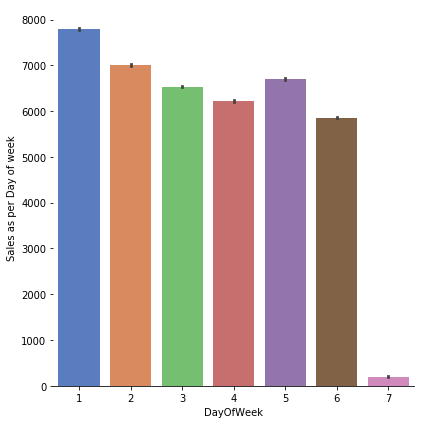

In [39]:
g = sns.factorplot(x='DayOfWeek',y='Sales',data=dt_sales,kind='bar',size=6,palette='muted')

g.despine(left=True)

g = g.set_ylabels('Sales as per Day of week')

#### Observation 
>From the above graph I can see that on 7th day of the week  sales is lowest but not zero <br/>
>From dataset description I know that from 1 to 7 stands from monday to sunday <br/>
>so I can conclude that 7th day is sunday and on this many of the stores is closed

C:\Users\Subhasish Das\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Subhasish Das\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


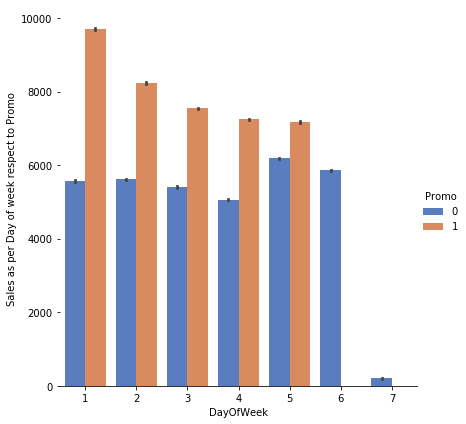

In [43]:
g = sns.factorplot(x='DayOfWeek',y='Sales',data=dt_sales,hue='Promo',kind='bar',size=6,palette='muted')

g.despine(left=True)

g = g.set_ylabels('Sales as per Day of week respect to Promo')

#### Observation 
>From the above graph I can see that there is no promotion on 7th day of the week so sales is lowest but not zero <br/>

C:\Users\Subhasish Das\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Subhasish Das\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


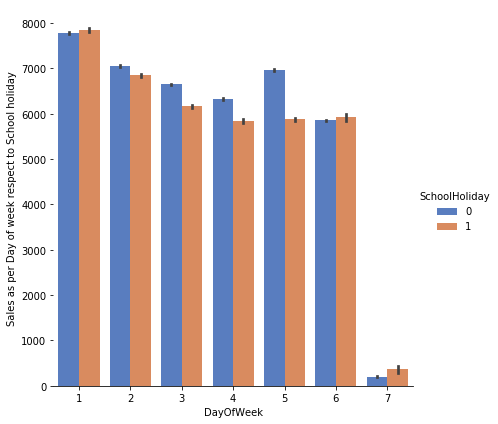

In [44]:
g = sns.factorplot(x='DayOfWeek',y='Sales',data=dt_sales,hue='SchoolHoliday',kind='bar',size=6,palette='muted')

g.despine(left=True)

g = g.set_ylabels('Sales as per Day of week respect to School holiday')

C:\Users\Subhasish Das\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Subhasish Das\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


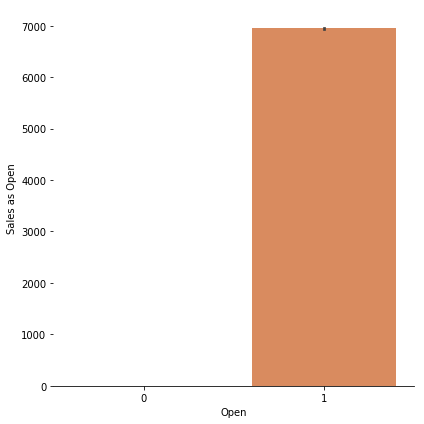

In [40]:
g = sns.factorplot(x='Open',y='Sales',data=dt_sales,kind='bar',size=6,palette='muted')

g.despine(left=True)

g = g.set_ylabels('Sales as Open')

#### Observation 
>It's clear from the graph that when store is open sales occured otherwise no sales <br/>

C:\Users\Subhasish Das\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Subhasish Das\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


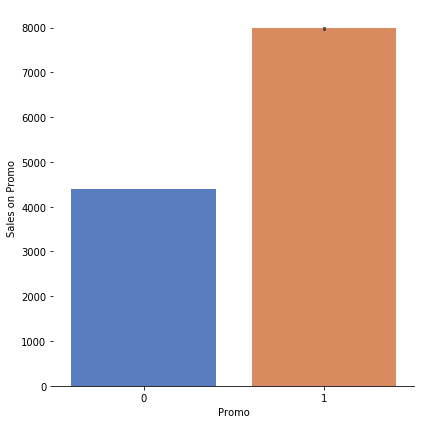

In [41]:
g = sns.factorplot(x='Promo',y='Sales',data=dt_sales,kind='bar',size=6,palette='muted')

g.despine(left=True)

g = g.set_ylabels('Sales on Promo')

#### Observation 
> From the above plot I see that when store's provide promotion sales is doubled the amount compared to sales when there is no promotion on store  <br/>
>So I can conclude that store's should provide more promotion in order to increase sales

C:\Users\Subhasish Das\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Subhasish Das\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


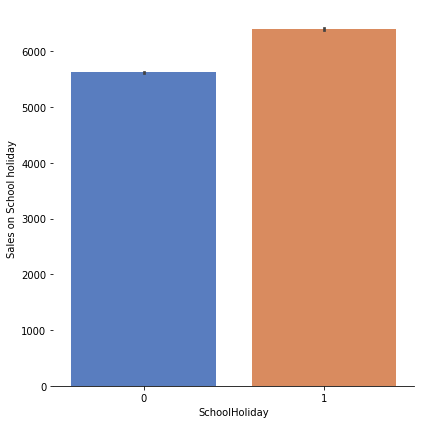

In [42]:
g=sns.factorplot(x='SchoolHoliday',y='Sales',data=dt_sales,kind='bar',size=6,palette='muted')
g.despine(left=True)

g = g.set_ylabels('Sales on School holiday')

#### Observation 
>School holidays showed an substantial increase in sale. Clearly stores need to beef up their supply during school holidays. If they can introduce some of the promotional offer this time. That might provide an additional boost to their sales figures

C:\Users\Subhasish Das\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Subhasish Das\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


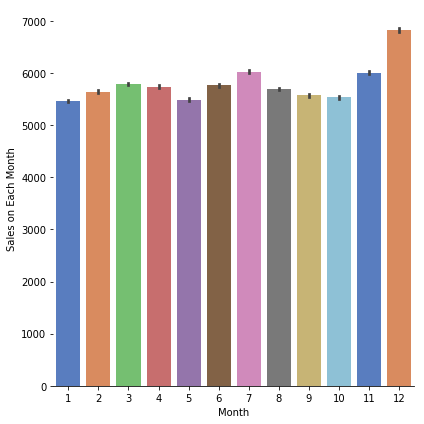

In [100]:
g=sns.factorplot(x='Month',y='Sales',data=dt_sales,kind='bar',size=6,palette='muted')
g.despine(left=True)

g = g.set_ylabels('Sales on Each Month')

#### Observation
> Month wise sales in the shop is shown here and in 12th month sale was highest  <br/>
>This indicate that store's should focus on the 12th  month to achive more sales

C:\Users\Subhasish Das\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Subhasish Das\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


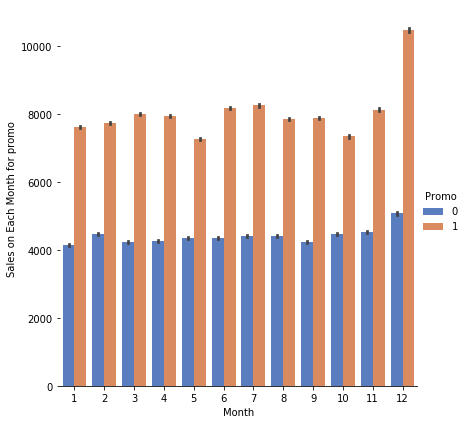

In [45]:
g=sns.factorplot(x='Month',y='Sales',data=dt_sales,hue='Promo',kind='bar',size=6,palette='muted')
g.despine(left=True)

g = g.set_ylabels('Sales on Each Month for promo')

#### Observation
> From the above graph it's clear that in 12th month most of the promotion was applied which increased the sales

C:\Users\Subhasish Das\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Subhasish Das\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


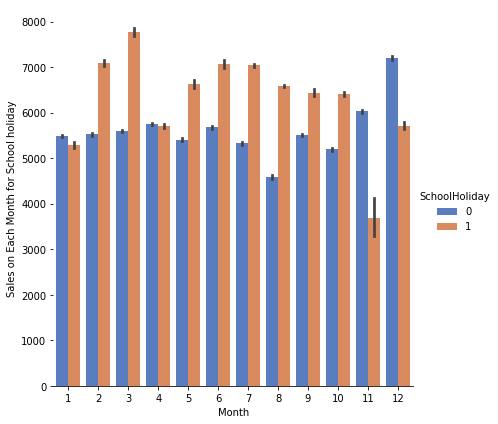

In [46]:
g=sns.factorplot(x='Month',y='Sales',data=dt_sales,hue='SchoolHoliday',kind='bar',size=6,palette='muted')
g.despine(left=True)

g = g.set_ylabels('Sales on Each Month for School holiday')

#### Observation
> From the above graph it's clear that in 3rd month most of the School holiday was applied which increased the sales <br/>
> I can also conclude that for 12th month sale is increased due to promotion

C:\Users\Subhasish Das\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Subhasish Das\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


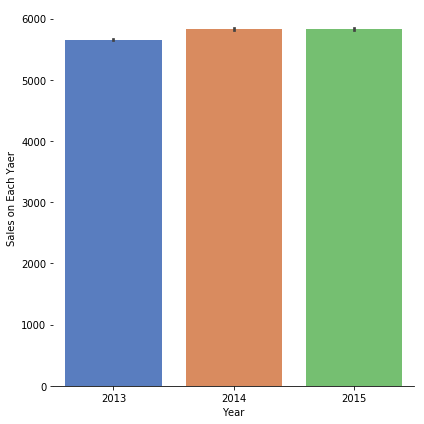

In [101]:
g=sns.factorplot(x='Year',y='Sales',data=dt_sales,kind='bar',size=6,palette='muted')
g.despine(left=True)

g = g.set_ylabels('Sales on Each Yaer')

#### Observation
> year wise sales in the shop is shown here   <br/>
> Sales is increasing on each year <br/>
> In case of 2015 the data is till for the month of june and I have also find that in 12th month sales increases the most

C:\Users\Subhasish Das\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Subhasish Das\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


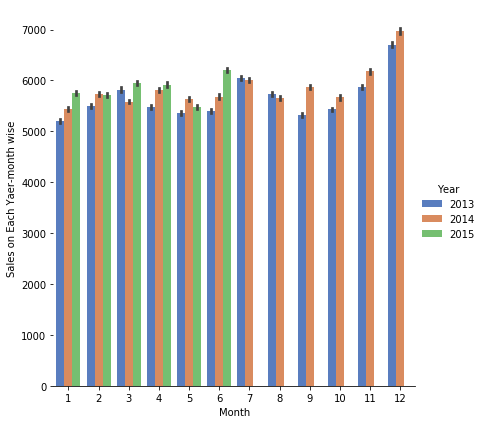

In [102]:
g=sns.factorplot(x='Month',y='Sales',data=dt_sales,kind='bar',hue='Year',size=6,palette='muted')
g.despine(left=True)

g = g.set_ylabels('Sales on Each Yaer-month wise')

#### Observation
> From this graph I can see that from january 2013 till June 2015 data is available in the dataset <br/>

C:\Users\Subhasish Das\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Subhasish Das\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


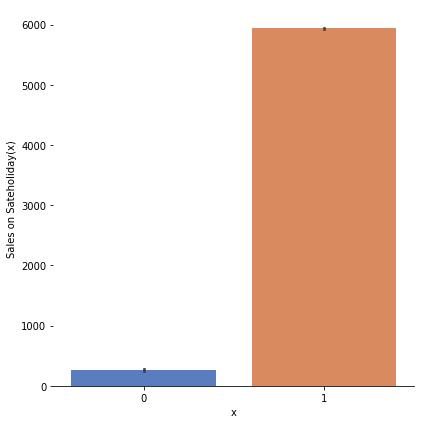

In [103]:
g=sns.factorplot(x='x',y='Sales',data=dt_sales,kind='bar',size=6,palette='muted')
g.despine(left=True)

g = g.set_ylabels('Sales on Sateholiday(x)')

#### Observation
> From this graph I can see that when x=1 sale's is high compare to that when x=0 sale's is very low  <br/>
> I know that x column is derived from Sate holiday column and 1 indicate that it's a state holiday and 0 indicate No Sate holiday <br/>
> So when I was applying corelation I got positive corelation for x column which indiacte when there is a Sateholiday sales is high and where there No Sateholiday sales is low

C:\Users\Subhasish Das\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Subhasish Das\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


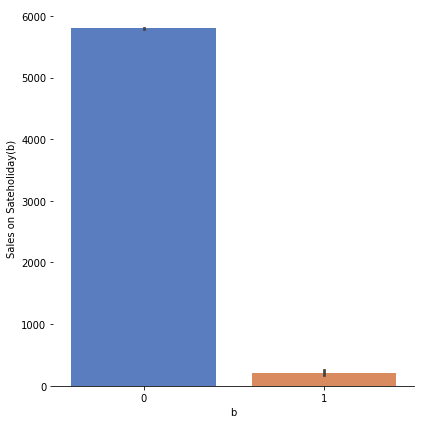

In [104]:
g=sns.factorplot(x='b',y='Sales',data=dt_sales,kind='bar',size=6,palette='muted')
g.despine(left=True)

g = g.set_ylabels('Sales on Sateholiday(b)')

#### Observation
> From this graph I can see that when b=1 sale's is low compare to that when b=0 sale's is very high  <br/>
> I know that column b is derived from Sate holiday column and 1 indicate that it's a state holiday and 0 indicate No Sate holiday <br/>
> So when I was applying corelation I got negative corelation for b column which indiacte when there is No Sateholiday sales is high and where there is Sateholiday sales is low

C:\Users\Subhasish Das\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Subhasish Das\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


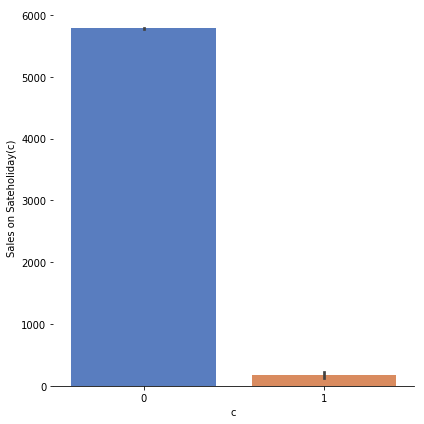

In [167]:
g=sns.factorplot(x='c',y='Sales',data=dt_sales,kind='bar',size=6,palette='muted')
g.despine(left=True)

g = g.set_ylabels('Sales on Sateholiday(c)')

#### Observation
> From this graph I can see that when c=1 sale's is low compare to that when c=0 sale's is very high  <br/>
> I know that column c is derived from Sate holiday column and 1 indicate that it's a state holiday and 0 indicate No Sate holiday <br/>
> So when I was applying corelation I got negative corelation for c column which indiacte when there is No Sateholiday sales is high and where there is Sateholiday sales is low

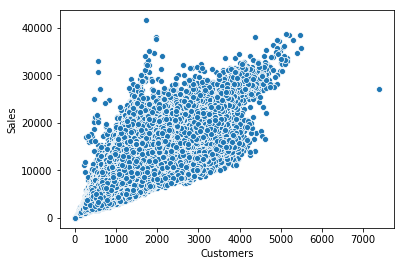

In [128]:
sns.scatterplot(dt_sales['Customers'], dt_sales['Sales'])

#### Observation
> From this graph I can see that from As the number of customer increases sales also increased <br/>

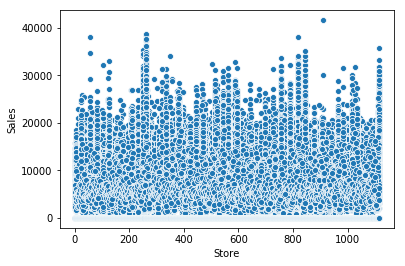

In [129]:
sns.scatterplot(dt_sales['Store'], dt_sales['Sales'])

## Model Development

In this section I will use differnt machine learning algorithm to predict the sales for these stores

### Performance Metric

>I am going to use R square value as performance metric. The intution behind R square value is when R square is closer to 1 indicates that it's a better model <br/>

In [47]:
x=dt_sales.drop('Sales',axis=1)
y=dt_sales['Sales']

Splitting the dataset into train and test dataset

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [49]:
x_train.shape,y_train.shape

((687850, 11), (687850,))

### Linear Regression

In [50]:
model_lr=LinearRegression()
model_lr.fit(x_train,y_train)
model_pred_tr=model_lr.predict(x_train)
model_pred_test=model_lr.predict(x_test)

In [51]:
print('R2 square for train',r2_score(y_train,model_pred_tr))
print('R2 square for test',r2_score(y_test,model_pred_test))

R2 square for train 0.8553460640816104
R2 square for test 0.8555793218856096


#### Observation
> As I know if R square vale is close to 1 it indicate that it's a good model <br/>
> From the above R square value for train and test I can see that both are close to 1 <br/>
> For both train and test set my model is giving same value for R Square which indicate that model is not over fit

Text(0, 0.5, 'Predicted sales ')

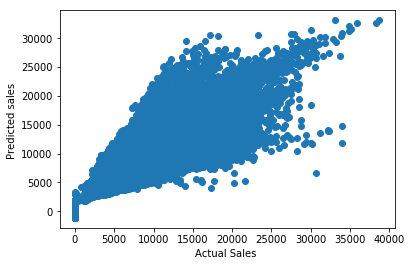

In [52]:
plt.scatter(y_test,model_pred_test)
plt.xlabel('Actual Sales ')
plt.ylabel('Predicted sales ')

### Statsmodels

In [53]:
from statsmodels.formula.api import ols

In [54]:
feature = ' + '.join(dt_sales.drop('Sales', axis = 1).columns)
'Sales ~ ' + feature

'Sales ~ Store + DayOfWeek + Customers + Open + Promo + SchoolHoliday + Month + Year + b + c + x'

In [55]:
mod = ols('Sales ~ ' + feature , data = dt_sales)
# fit the model
lm = mod.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 5.285e+05
Date:                Mon, 04 Jan 2021   Prob (F-statistic):               0.00
Time:                        00:16:32   Log-Likelihood:            -8.5586e+06
No. Observations:              982644   AIC:                         1.712e+07
Df Residuals:                  982632   BIC:                         1.712e+07
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.004e+05   4123.652    -72.844      0.000   -3.08e+05   -2.92e+05
Store            -0.1501      0.005    -32.634      0.000      -0.159      -0.141
DayOfWeek       -76.5861      0.968    -79.133      0.000     -78.483     -74.689
Customers         6.0501      0.004   1466.571      0.000       6.042       6.058
Open           1492.3757      6.004    248.578      0.000    1480.609    1504.143
Promo          1281.7665      3.389    378.207      0.000    1275.124    1288.409
SchoolHoliday    52.8502      4.131     12.794      0.000      44.754      60.947
Month            34.2522      0.465     73.630      0.000      33.340      35.164
Year            148.9854      2.047     72.774      0.000     144.973     152.998
b              -218.9756     20.887    -10.484      0.000    -259.914    -178.037
c               310.5084     25.480     12.186      0.000     260.569     360.448
x               774.4552     11.442     67.688      0.000     752.030     796.880
==============================================================================
Omnibus:                   182437.015   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3573414.000
Skew:                           0.349   Prob(JB):                         0.00
Kurtosis:                      12.316   Cond. No.                     6.10e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Observation
>As I know if R square and adjusted R square values are close to each other means that input paramter's I am using are corelated to the target variable <br/>


### Random Forest

In [56]:
model_rand=RandomForestRegressor()
model_rand.fit(x_train,y_train)
model_rand_train=model_rand.predict(x_train)
model_rand_test=model_rand.predict(x_test)

C:\Users\Subhasish Das\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [57]:
print('R2 square for train',r2_score(y_train,model_rand_train))
print('R2 square for test',r2_score(y_test,model_rand_test))

R2 square for train 0.9921715955750191
R2 square for test 0.9570741376816146


#### Observation
> From Random forest model I am getting R2 square value more closer to 1 which indicate that this model is better than Linear Regression model  <br/>

Text(0, 0.5, 'Predicted sales ')

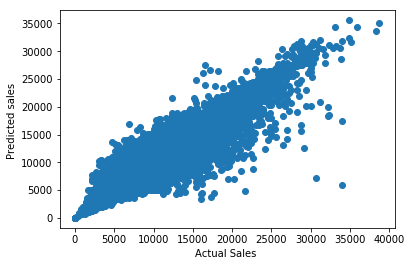

In [58]:
plt.scatter(y_test,model_rand_test)
plt.xlabel('Actual Sales ')
plt.ylabel('Predicted sales ')

### Decision Tree

In [59]:
dct_mod=DecisionTreeRegressor()
dct_mod.fit(x_train,y_train)
dct_mod_train=dct_mod.predict(x_train)
dct_mod_test=dct_mod.predict(x_test)

In [60]:
print('R2 square for train',r2_score(y_train,dct_mod_train))
print('R2 square for test',r2_score(y_test,dct_mod_test))

R2 square for train 0.9999841065099947
R2 square for test 0.9282389532728439


#### Observation
> From Decision Tree Regressor model I am getting R2 square value .92 which is less than the value I got from Random Forest  <br/>

Text(0, 0.5, 'Predicted sales ')

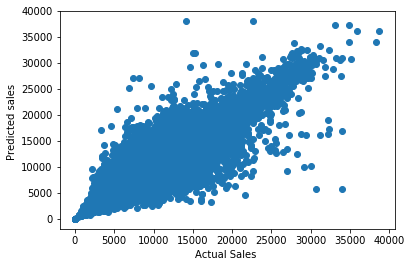

In [61]:
plt.scatter(y_test,dct_mod_test)
plt.xlabel('Actual Sales ')
plt.ylabel('Predicted sales ')

### Cross validation score

In [34]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold,learning_curve
kfold = StratifiedKFold(n_splits=10)
classifiers = []
random_state = 2
classifiers.append(LinearRegression())
classifiers.append(RandomForestRegressor())
classifiers.append(DecisionTreeRegressor())

C:\Users\Subhasish Das\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Subhasish Das\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Subhasish Das\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Subhasish Das\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number 

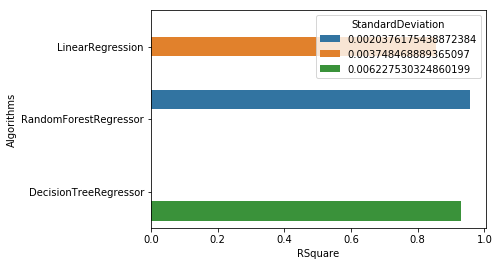

In [44]:
cv_results = []
cv_RSquare=[]

for classifier in classifiers:
    cv_results.append(cross_val_score(classifier,x_train,y=y_train,cv=kfold,n_jobs=4))
    classifier.fit(x_train,y_train)
    pred=classifier.predict(x_test)
    cv_RSquare.append(r2_score(y_test,pred))
    #cv_results.append(np.sqrt(mean_squared_error(y_hidd,pred)))
cv_means = []
cv_std = []



for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
    

cv_results = pd.DataFrame({'CrossValMeans':cv_means,'StandardDeviation':cv_std,'RSquare':cv_RSquare,
                           'Algorithms':['LinearRegression','RandomForestRegressor','DecisionTreeRegressor']})

g = sns.barplot(x='RSquare',y='Algorithms',hue='StandardDeviation',data=cv_results)

#### Conclusion
> To increase the sales for store more promotion is needed. From the data it's clear that in 12th month sales is increased<br/>
> From the dataset I can also conclude that in 12th month sales should be high so store's should keep more stuffs in the shope<br/>
> From the above graph I can conclude that Random forest Provide best result for our sales data set<br/>